In [1]:
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt

In [2]:
#1. Significant earthquakes since 2150 B.C.
#读取文件，读取文件的基本信息
Sig_Eqs=pd.read_csv('earthquakes-2025-10-29_15-11-32_+0800.tsv',sep='\t')


In [3]:
Sig_Eqs.head()

,Search Parameters,Id,Year,Mo,Dy,Hr,Mn,Sec,Tsu,Vol,...,Total Missing,Total Missing Description,Total Injuries,Total Injuries Description,Total Damage ($Mil),Total Damage Description,Total Houses Destroyed,Total Houses Destroyed Description,Total Houses Damaged,Total Houses Damaged Description
0,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,1.0,-2150.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,2.0,-2000.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,3.0,-2000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN
4,NaN,5877.0,-1610.0,NaN,NaN,NaN,NaN,NaN,3.0,1351.0,...,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN


In [4]:
Sig_Eqs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6616 entries, 0 to 6615
Data columns (total 49 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Search Parameters                   1 non-null      object 
 1   Id                                  6615 non-null   float64
 2   Year                                6615 non-null   float64
 3   Mo                                  6202 non-null   float64
 4   Dy                                  6045 non-null   float64
 5   Hr                                  4502 non-null   float64
 6   Mn                                  4289 non-null   float64
 7   Sec                                 3831 non-null   float64
 8   Tsu                                 2083 non-null   float64
 9   Vol                                 81 non-null     float64
 10  Country                             6615 non-null   object 
 11  Area                                332 non

In [5]:
#1.1Compute the total number of deaths caused by earthquakes since 2150 B.C. in each country, and then print the top ten countries along with the total number of deaths.
Sig_Eqs.groupby('Country')['Deaths'].sum().sort_values(ascending=False)[0:10]

Country
CHINA         2139210.0
TURKEY        1199742.0
IRAN          1014453.0
ITALY          498219.0
SYRIA          419226.0
HAITI          323484.0
AZERBAIJAN     319251.0
JAPAN          242445.0
ARMENIA        191890.0
PAKISTAN       145083.0
Name: Deaths, dtype: float64

In [6]:
#1.2Compute the total number of earthquakes with magnitude larger than 6.0 (use column Mag as the magnitude) worldwide each year, and then plot the time series.
Sig_Eqs[Sig_Eqs['Mag'] > 6.0].groupby('Year').size()


Year
-2150.0     1
-2000.0     1
-1250.0     1
-1050.0     1
-479.0      1
           ..
 2021.0    23
 2022.0    21
 2023.0    27
 2024.0    13
 2025.0    18
Length: 552, dtype: int64

趋势：在1800年之前，震级大于6级的地震总数较少，1800之后震级大于6级的地震总数急剧上升,数量可达到30以上。原因：前部分记录仪器较少，且人类活动较少


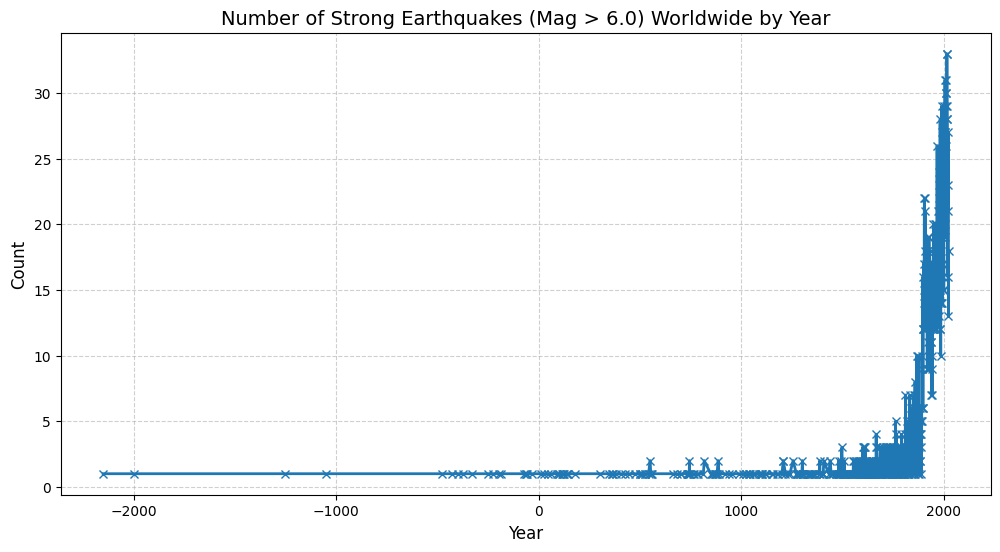

In [7]:
plt.figure(figsize=(12, 6))
Sig_Eqs[Sig_Eqs['Mag'] > 6.0].groupby('Year').size().plot(kind='line', marker='x', linewidth=2)
plt.title('Number of Strong Earthquakes (Mag > 6.0) Worldwide by Year', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
print('趋势：在1800年之前，震级大于6级的地震总数较少，1800之后震级大于6级的地震总数急剧上升,数量可达到30以上。原因：前部分记录仪器较少，且人类活动较少')

In [8]:
#1.3.1Data Preprocessing
# Handling Date  Missing Values
Sig_Eqs=Sig_Eqs.dropna(subset=['Year','Mo','Dy']).copy()
#change date type
Sig_Eqs['Mo'] = Sig_Eqs['Mo'].astype(int)
Sig_Eqs['Dy'] = Sig_Eqs['Dy'].astype(int)
Sig_Eqs['Year'] = Sig_Eqs['Year'].astype(int)
#merge date
Sig_Eqs['Date']=pd.to_datetime({'year':Sig_Eqs['Year'],'month':Sig_Eqs['Mo'],'day':Sig_Eqs['Dy']},errors='coerce')
#delete missing data
Sig_Eqs=Sig_Eqs.dropna(subset=['Date'])

# Processing massing mag 
Sig_Eqs['Mag']=Sig_Eqs['Mag'].fillna(-np.inf)

#Processing country
Sig_Eqs=Sig_Eqs.dropna(subset=['Country'])

In [9]:
#1.3Define function
def CountEq_LargestEq(country):
    country_eqs=Sig_Eqs[(Sig_Eqs['Country']==country)]
    total_eqs=len(country_eqs)
    if total_eqs>0:
        largest_eq=country_eqs.sort_values('Mag',ascending=False).iloc[0]
        largest_date=largest_eq['Date']
    else:
        largest_date=None
    return(total_eqs,largest_date)

#1.3.3 apply function
countries=Sig_Eqs['Country'].unique()
results={}
for country in countries:
    count_and_date = CountEq_LargestEq(country)
    results[country]=count_and_date

result_df=pd.DataFrame.from_dict(results,orient='index',columns=['Total Earthquakes','Largest Earthquake Date'])

result_df=result_df.sort_values('Total Earthquakes',ascending=False).reset_index()
result_df=result_df.rename(columns={'index':'Country'})

#result
print(result_df)

        Country  Total Earthquakes Largest Earthquake Date
0         CHINA                476              1906-12-22
1     INDONESIA                406              2004-12-26
2         JAPAN                348              2011-03-11
3          IRAN                280              2013-04-16
4           USA                275              1964-03-28
..          ...                ...                     ...
149  TASMAN SEA                  1              1892-01-26
150        TOGO                  1              1933-05-19
151  MONTSERRAT                  1              1897-04-25
152    KIRIBATI                  1              1905-06-30
153     COMOROS                  1              2018-05-15

[154 rows x 3 columns]


In [10]:
#2. Wind speed in Shenzhen from 2010 to 2020
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [11]:
#读取文件
WDSZ=pd.read_csv('2281305.csv')
WDSZ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111984 entries, 0 to 111983
Data columns (total 43 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   STATION            111984 non-null  int64 
 1   DATE               111984 non-null  object
 2   SOURCE             111984 non-null  int64 
 3   REPORT_TYPE        111984 non-null  object
 4   CALL_SIGN          111984 non-null  object
 5   QUALITY_CONTROL    111984 non-null  object
 6   AA1                6493 non-null    object
 7   AA2                1752 non-null    object
 8   AA3                490 non-null     object
 9   AJ1                12 non-null      object
 10  AY1                5889 non-null    object
 11  AY2                4384 non-null    object
 12  CALL_SIGN.1        111984 non-null  object
 13  CIG                111984 non-null  object
 14  DEW                111984 non-null  object
 15  ED1                423 non-null     object
 16  EQD                4

d:\program files\python37\lib\site-packages\IPython\core\interactiveshell.py:3553: DtypeWarning: Columns (4,8,9,12,15,21,22,24,26,31,33,34) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [12]:
WDSZ.head()

,STATION,DATE,SOURCE,REPORT_TYPE,CALL_SIGN,QUALITY_CONTROL,AA1,AA2,AA3,AJ1,...,OD1,OD2,QUALITY_CONTROL.1,REM,REPORT_TYPE.1,SLP,SOURCE.1,TMP,VIS,WND
0,59493099999,2010-01-02T00:00:00,4,SY-MT,ZGSZ,V020,"06,0000,2,1","24,0000,2,1",NaN,NaN,...,NaN,NaN,V020,SYN088AAXX 02001 59493 11740 80402 10161 2013...,SY-MT,"10161,1",4,"+0161,1","004000,1,N,1","040,1,N,0020,1"
1,59493099999,2010-01-02T01:00:00,4,FM-15,ZGSZ,V020,NaN,NaN,NaN,NaN,...,NaN,NaN,V020,MET068METAR ZGSZ 020100Z VRB01MPS 2600 BR FEW0...,FM-15,"99999,9",4,"+0170,1","002600,1,N,1","999,9,V,0010,1"
2,59493099999,2010-01-02T02:00:00,4,FM-15,ZGSZ,V020,NaN,NaN,NaN,NaN,...,NaN,NaN,V020,MET068METAR ZGSZ 020200Z 00000MPS 2600 BR FEW0...,FM-15,"99999,9",4,"+0180,1","002600,1,N,1","999,9,C,0000,1"
3,59493099999,2010-01-02T03:00:00,4,SY-MT,ZGSZ,V020,NaN,NaN,NaN,NaN,...,NaN,NaN,V020,SYN066AAXX 02031 59493 41750 81401 10192 2014...,SY-MT,"10169,1",4,"+0192,1","005000,1,N,1","140,1,N,0010,1"
4,59493099999,2010-01-02T04:00:00,4,FM-15,ZGSZ,V020,NaN,NaN,NaN,NaN,...,NaN,NaN,V020,MET068METAR ZGSZ 020400Z 30004MPS 2100 BR FEW0...,FM-15,"99999,9",4,"+0180,1","002100,1,N,1","300,1,N,0040,1"


In [13]:
#取出需要的两列
WDSZ2=WDSZ[['DATE','WND']]
WDSZ2.head()

,DATE,WND
0,2010-01-02T00:00:00,"040,1,N,0020,1"
1,2010-01-02T01:00:00,"999,9,V,0010,1"
2,2010-01-02T02:00:00,"999,9,C,0000,1"
3,2010-01-02T03:00:00,"140,1,N,0010,1"
4,2010-01-02T04:00:00,"300,1,N,0040,1"


In [14]:
WDSZ2['WND'] = WDSZ2['WND'].astype(str)

split_wnd=WDSZ2['WND'].str.split(',',expand=True)
split_wnd.columns = [
    'WIND-OBSERVATION direction angle',
    'WIND-OBSERVATION direction quality code',
    'WIND-OBSERVATION type code',
    'WIND-OBSERVATION speed rate',
    'WIND-OBSERVATION speed quality code'
]
# Delete the original ‘WND’ column and insert the newly split columns
WDSZ2=WDSZ2.drop('WND',axis=1)
WDSZ2=pd.concat([WDSZ2,split_wnd],axis=1)
WDSZ2

d:\program files\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,DATE,WIND-OBSERVATION direction angle,WIND-OBSERVATION direction quality code,WIND-OBSERVATION type code,WIND-OBSERVATION speed rate,WIND-OBSERVATION speed quality code
0,2010-01-02T00:00:00,040,1,N,0020,1
1,2010-01-02T01:00:00,999,9,V,0010,1
2,2010-01-02T02:00:00,999,9,C,0000,1
3,2010-01-02T03:00:00,140,1,N,0010,1
4,2010-01-02T04:00:00,300,1,N,0040,1
...,...,...,...,...,...,...
111979,2020-09-11T17:00:00,170,1,N,0030,1
111980,2020-09-11T18:00:00,180,1,N,0040,1
111981,2020-09-11T19:00:00,220,1,V,0030,1
111982,2020-09-11T20:00:00,260,1,N,0030,1


In [15]:
#过滤数据
WDSZ2['WIND-OBSERVATION direction quality code'] =WDSZ2[
    'WIND-OBSERVATION direction quality code'].replace([
    '2','3','6','7'],pd.NA).dropna().astype(int)


WDSZ2['WIND-OBSERVATION speed rate'] = WDSZ2[
    'WIND-OBSERVATION speed rate'].replace('999',pd.NA).dropna().astype(int)


WDSZ['WIND-OBSERVATION speed quality code'] = WDSZ2[
    'WIND-OBSERVATION speed quality code'].replace([
    '2','3','6','7'],pd.NA).dropna().astype(int)

In [16]:
WDSZ2

,DATE,WIND-OBSERVATION direction angle,WIND-OBSERVATION direction quality code,WIND-OBSERVATION type code,WIND-OBSERVATION speed rate,WIND-OBSERVATION speed quality code
0,2010-01-02T00:00:00,040,1,N,20,1
1,2010-01-02T01:00:00,999,9,V,10,1
2,2010-01-02T02:00:00,999,9,C,0,1
3,2010-01-02T03:00:00,140,1,N,10,1
4,2010-01-02T04:00:00,300,1,N,40,1
...,...,...,...,...,...,...
111979,2020-09-11T17:00:00,170,1,N,30,1
111980,2020-09-11T18:00:00,180,1,N,40,1
111981,2020-09-11T19:00:00,220,1,V,30,1
111982,2020-09-11T20:00:00,260,1,N,30,1


In [17]:
print(type(WDSZ2['DATE']))

<class 'pandas.core.series.Series'>


趋势分析：深圳2010至2020年间月平均风速波动较大，期间出现多次高峰（如2015年、2016年），但整体无明显长期上升或下降趋势，2010年和2020年风速均处于相对较低水平，主要呈现年际波动特征。


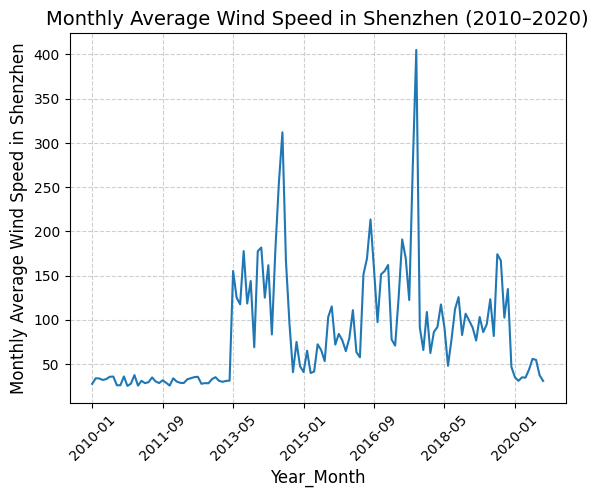

In [18]:
WDSZ2['DATE']=pd.to_datetime(WDSZ2['DATE'])

WDSZ2['year_month'] = WDSZ2['DATE'].dt.strftime('%Y-%m')

month=WDSZ2['WIND-OBSERVATION speed rate'].groupby(WDSZ2['year_month']).mean().plot()

plt.xticks(rotation=45)
plt.title('Monthly Average Wind Speed in Shenzhen (2010–2020)', fontsize=14)
plt.xlabel('Year_Month', fontsize=12)
plt.ylabel('Monthly Average Wind Speed in Shenzhen', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

print("趋势分析：深圳2010至2020年间月平均风速波动较大，期间出现多次高峰（如2015年、2016年），但整体无明显长期上升或下降趋势，2010年和2020年风速均处于相对较低水平，主要呈现年际波动特征。")

In [19]:
#3. Explore a data set
#选取的是CASEarth中的数据，是兰州大学寒旱区科学观测网络2018—2019年的一些相关数据
#https://data.casearth.cn/dataset/5feae826819aec33049b7cc7
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
!pip install openpyxl

You should consider upgrading via the 'd:\program files\python37\python.exe -m pip install --upgrade pip' command.


In [20]:
data=pd.read_excel("2018 Lanzhou University Cold and Arid Regions Scientific Observation Network Guazhou Station.xlsx")

In [21]:
data.head()

,Date/Time,Wdir,Wnd,Std_uy,Tv,H2O,CO2,Ustar,L,Hs,LE,Fc,QA_Hs,QA_LE,QA_Fc
0,-6999,°,m/s,m/s,℃,g/m3,mg/m3,[m+1s-1],m,W/m2,W/m2,mg/(m2s),-,-,-
1,2018-09-23 00:30:00,8.819528,305.542536,0.772491,15.684483,8.819528,305.542536,0.379347,97.322818,-41.742013,1.630538,0.360399,1,1,1
2,2018-09-23 01:00:00,8.202629,302.645823,0.694023,15.270833,8.202629,302.645823,0.351198,72.222056,-44.633302,0.969027,0.491888,1,4,1
3,2018-09-23 01:30:00,7.617878,300.314145,0.627909,15.081841,7.617878,300.314145,0.307679,56.211913,-38.559205,1.618003,0.511152,1,1,1
4,2018-09-23 02:00:00,7.609132,300.266224,0.631314,15.026563,7.609132,300.266224,0.298211,46.919563,-42.054427,1.39509,0.515973,1,1,1


In [22]:
#3.1
data=data.replace(-6999,pd.NA).dropna()

data['QA_Hs']=data['QA_Hs'].replace(9,pd.NA).dropna()
data['QA_LE']=data['QA_LE'].replace(9,pd.NA).dropna()
data['QA_Fc']=data['QA_Fc'].replace(9,pd.NA).dropna()

data

,Date/Time,Wdir,Wnd,Std_uy,Tv,H2O,CO2,Ustar,L,Hs,LE,Fc,QA_Hs,QA_LE,QA_Fc
1,2018-09-23 00:30:00,8.819528,305.542536,0.772491,15.684483,8.819528,305.542536,0.379347,97.322818,-41.742013,1.630538,0.360399,1,1,1
2,2018-09-23 01:00:00,8.202629,302.645823,0.694023,15.270833,8.202629,302.645823,0.351198,72.222056,-44.633302,0.969027,0.491888,1,4,1
3,2018-09-23 01:30:00,7.617878,300.314145,0.627909,15.081841,7.617878,300.314145,0.307679,56.211913,-38.559205,1.618003,0.511152,1,1,1
4,2018-09-23 02:00:00,7.609132,300.266224,0.631314,15.026563,7.609132,300.266224,0.298211,46.919563,-42.054427,1.39509,0.515973,1,1,1
5,2018-09-23 02:30:00,7.381723,299.321645,0.573368,14.883173,7.381723,299.321645,0.295813,51.280987,-37.547232,1.083762,0.536323,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3924,2018-12-31 22:00:00,2.26771,289.333007,0.246406,-16.398183,2.26771,289.333007,0.059103,258.127323,-0.059568,0.211779,-0.139703,NaN,8,8
3925,2018-12-31 22:30:00,2.072874,285.912638,0.130206,-16.152017,2.072874,285.912638,0.038356,-0.766587,5.481414,0.897001,-0.235766,5,5,5
3926,2018-12-31 23:00:00,1.473456,302.347846,0.438393,-15.504245,1.473456,302.347846,0.12881,23.214319,-6.856081,-1.273993,0.163588,6,6,6
3927,2018-12-31 23:30:00,1.039458,274.909398,0.25363,-15.398119,1.039458,274.909398,0.200545,9.183108,-65.392218,-4.986806,-0.173931,5,5,5


In [23]:
#3.2
data['Date/Time']=data['Date/Time'].astype(str)
data[['Date', 'Time']] = data['Date/Time'].str.split(' ', expand=True)

data

,Date/Time,Wdir,Wnd,Std_uy,Tv,H2O,CO2,Ustar,L,Hs,LE,Fc,QA_Hs,QA_LE,QA_Fc,Date,Time
1,2018-09-23 00:30:00,8.819528,305.542536,0.772491,15.684483,8.819528,305.542536,0.379347,97.322818,-41.742013,1.630538,0.360399,1,1,1,2018-09-23,00:30:00
2,2018-09-23 01:00:00,8.202629,302.645823,0.694023,15.270833,8.202629,302.645823,0.351198,72.222056,-44.633302,0.969027,0.491888,1,4,1,2018-09-23,01:00:00
3,2018-09-23 01:30:00,7.617878,300.314145,0.627909,15.081841,7.617878,300.314145,0.307679,56.211913,-38.559205,1.618003,0.511152,1,1,1,2018-09-23,01:30:00
4,2018-09-23 02:00:00,7.609132,300.266224,0.631314,15.026563,7.609132,300.266224,0.298211,46.919563,-42.054427,1.39509,0.515973,1,1,1,2018-09-23,02:00:00
5,2018-09-23 02:30:00,7.381723,299.321645,0.573368,14.883173,7.381723,299.321645,0.295813,51.280987,-37.547232,1.083762,0.536323,1,1,1,2018-09-23,02:30:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3924,2018-12-31 22:00:00,2.26771,289.333007,0.246406,-16.398183,2.26771,289.333007,0.059103,258.127323,-0.059568,0.211779,-0.139703,NaN,8,8,2018-12-31,22:00:00
3925,2018-12-31 22:30:00,2.072874,285.912638,0.130206,-16.152017,2.072874,285.912638,0.038356,-0.766587,5.481414,0.897001,-0.235766,5,5,5,2018-12-31,22:30:00
3926,2018-12-31 23:00:00,1.473456,302.347846,0.438393,-15.504245,1.473456,302.347846,0.12881,23.214319,-6.856081,-1.273993,0.163588,6,6,6,2018-12-31,23:00:00
3927,2018-12-31 23:30:00,1.039458,274.909398,0.25363,-15.398119,1.039458,274.909398,0.200545,9.183108,-65.392218,-4.986806,-0.173931,5,5,5,2018-12-31,23:30:00


In [24]:
data['Date']=pd.to_datetime(data['Date'])



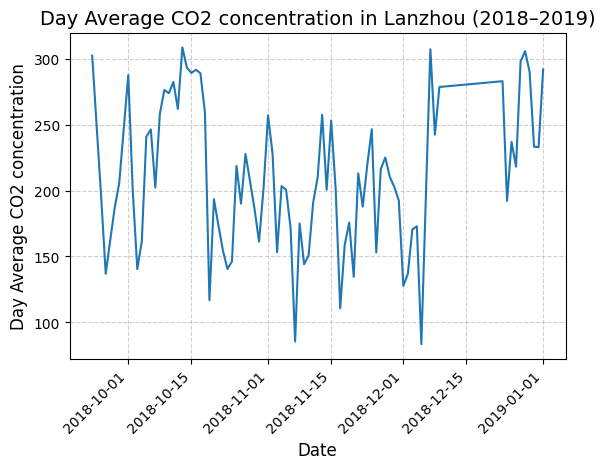

In [25]:
data_=data['CO2'].groupby(data['Date']).mean().plot()
data_
plt.xticks(rotation=45)
plt.title('Day Average CO2 concentration in Lanzhou (2018–2019)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Day Average CO2 concentration', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

In [26]:
#3.3
print('max:',data['CO2'].max())
print('min:',data['CO2'].min())
print('mean:',data['CO2'].mean())
print(data['CO2'].describe())
print('标准差：',data['CO2'].std())

max: 359.714003166053
min: 0.053299356419432
mean: 208.91937077373453
count     3653.000000
unique    3653.000000
top        305.542536
freq         1.000000
Name: CO2, dtype: float64
标准差： 104.5320950222388


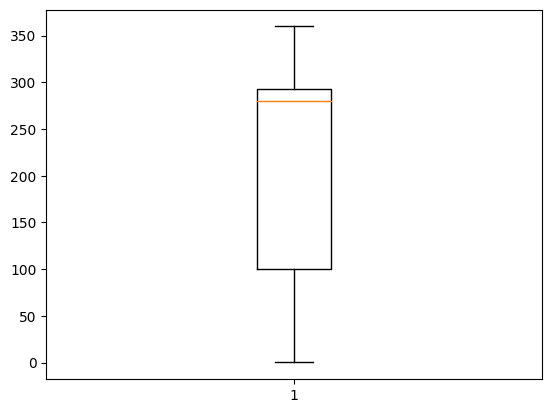

图形分析：箱型图中可以得出没有异常值


In [27]:
plt.boxplot(data['CO2'])
plt.show()
print('图形分析：箱型图中可以得出没有异常值')

(array([ 49.,  47.,  37.,  76.,  75., 120., 168., 264., 248., 173., 110.,
         54.,  27.,  18.,  19.,  20.,  20.,  21.,  15.,  20.,  36.,  43.,
         91., 759., 416., 338., 186.,  87.,  63.,  53.]),
 array([0.053299356419432, 12.041989483407217, 24.030679610395005,
        36.01936973738279, 48.00805986437057, 59.99674999135836,
        71.98544011834615, 83.97413024533392, 95.96282037232172,
        107.9515104993095, 119.94020062629728, 131.9288907532851,
        143.91758088027288, 155.90627100726067, 167.89496113424843,
        179.88365126123622, 191.87234138822402, 203.8610315152118,
        215.8497216421996, 227.83841176918736, 239.82710189617515,
        251.81579202316294, 263.8044821501507, 275.79317227713847,
        287.7818624041263, 299.77055253111405, 311.75924265810187,
        323.74793278508963, 335.7366229120774, 347.7253130390652,
        359.714003166053], dtype=object),
 <BarContainer object of 30 artists>)

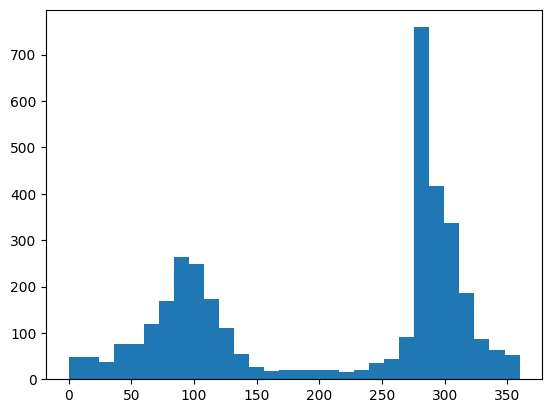

In [28]:
plt.hist(data['CO2'], bins=30)

In [29]:
print("CO2的浓度在0.05—359.71 mg/m3之间，经过滤之后有3653个数据，众数在305.54 mg/m3，平均数为208.92 mg/m3，标准差为104.53。从箱型图中可看出并无异常值，从直方图中可看出在300 mg/m3左右的分布较多。")

CO2的浓度在0.05—359.71 mg/m3之间，经过滤之后有3653个数据，众数在305.54 mg/m3，平均数为208.92 mg/m3，标准差为104.53。从箱型图中可看出并无异常值，从直方图中可看出在300 mg/m3左右的分布较多。
